In [93]:
from igraph import *
import cairo
import numpy as np

### Get 1-net for graph

In [55]:
# returns list of 1-net labels for initial graph
def get_net(graph):
    result_graph = Graph()   
    # adjacency matrix for initial graph
    adjlist = graph.get_adjlist()
        
    # loop through all nodes of initial graph
    for ind, node in enumerate(graph.vs):
        # get adjacent vertices for node
        adj_vertices = list(map(lambda adj_index: graph.vs[adj_index], adjlist[ind]))
        adj_vertices.append(node)
        
        # put max degree vertice to net(if not in the net already)
        max_vertice = sorted(adj_vertices, key=lambda node: node.degree(), reverse=True)[0]
        try:
            result_graph.vs.find(label=max_vertice["label"])
        except:
            result_graph.add_vertex(**max_vertice.attributes())
        
    return list(map(lambda node: node["label"], result_graph.vs))
    
# get a random geometric graph and set labels
def init_graph(n=10, radius=0.5):
    g = Graph.GRG(n, radius)
    g.vs["color"] = "green"
    for ind, val in enumerate(g.vs):
        g.vs[ind]["label"] = ind
        
    return g

### Check get_net method(green - regular nodes, red - net nodes)

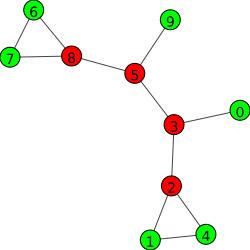

In [96]:
g = init_graph()
label_map = get_net(g)
for label in label_map:
    g.vs.find(label=label)["color"] = "red"

layout = g.layout("kk")
plot(g, layout=layout, bbox=(250, 250), margin=10)    

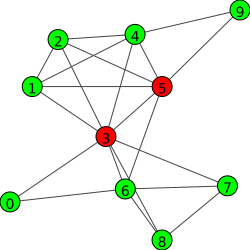

In [95]:
g = init_graph()
label_map = get_net(g)
for label in label_map:
    g.vs.find(label=label)["color"] = "red"

layout = g.layout("kk")
plot(g, layout=layout, bbox=(250, 250), margin=10)    

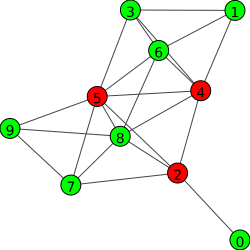

In [87]:
g = init_graph()
label_map = get_net(g)
for label in label_map:
    g.vs.find(label=label)["color"] = "red"

layout = g.layout("kk")
plot(g, layout=layout, bbox=(250, 250), margin=10)    

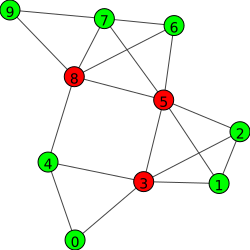

In [88]:
g = init_graph()
label_map = get_net(g)
for label in label_map:
    g.vs.find(label=label)["color"] = "red"

layout = g.layout("kk")
plot(g, layout=layout, bbox=(250, 250), margin=10)    

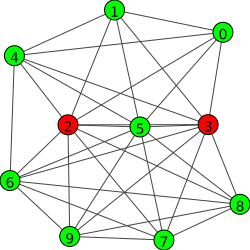

In [89]:
g = init_graph()
label_map = get_net(g)
for label in label_map:
    g.vs.find(label=label)["color"] = "red"

layout = g.layout("kk")
plot(g, layout=layout, bbox=(250, 250), margin=10)    

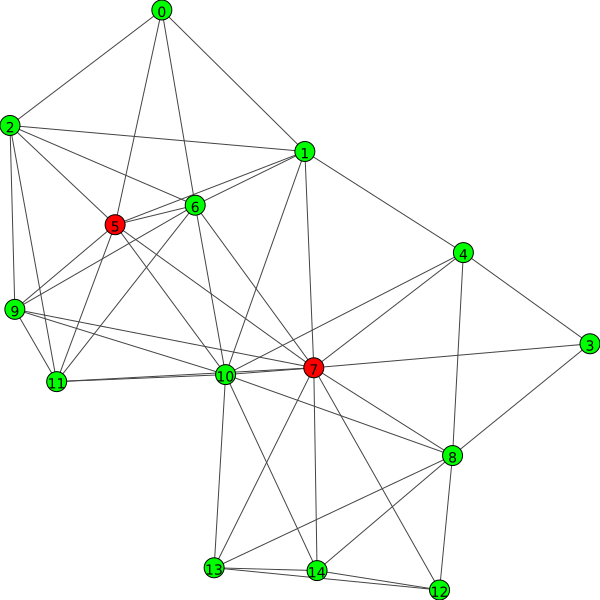

In [92]:
g = init_graph(15, 0.5)
label_map = get_net(g)
for label in label_map:
    g.vs.find(label=label)["color"] = "red"

layout = g.layout("kk")
plot(g, layout=layout, margin=10)    

### Get k-net for graph

In [158]:
# returns derived graph
def get_derived_graph(g, k):
    adjacency_matrix = np.array(list(map(lambda row: row, g.get_adjacency())), dtype=np.int16)
    np.fill_diagonal(adjacency_matrix, 1)    
    
    # get initial graph adjacency matrix to power of k
    power = np.linalg.matrix_power(adjacency_matrix, k)
    np.fill_diagonal(power, 0)

    # init graph from new adjacency matrix
    derived = Graph.Adjacency(power.astype(bool).tolist(), mode=ADJ_UNDIRECTED)
    for ind, val in enumerate(derived.vs):
        derived.vs[ind].update_attributes(g.vs[ind].attributes())
    
    return derived
        
# marks the k-net nodes in the initial graph
def get_knet(g, k):
    derived = get_derived_graph(g, k)
    label_map = get_net(derived)
    
    # set lables
    g.vs["color"] = "green"
    for label in label_map:
        g.vs.find(label=label)["color"] = "red"

### Check get_derived_graph method

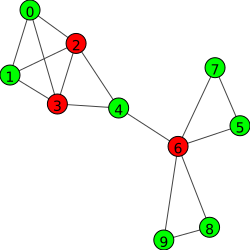

In [153]:
g = init_graph()
label_map = get_net(g)
for label in label_map:
    g.vs.find(label=label)["color"] = "red"

layout = g.layout("kk")
plot(g, layout=layout, bbox=(250, 250), margin=10) 

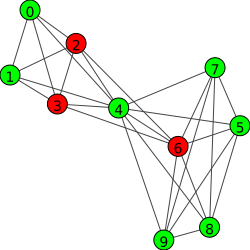

In [157]:
newg = get_derived_graph(g, 2)
plot(newg, layout=layout, bbox=(250, 250), margin=10) 

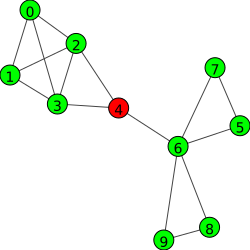

In [159]:
get_knet(g, 2)
plot(g, layout=layout, bbox=(250, 250), margin=10) 

### Check get_knet method (k == 3)

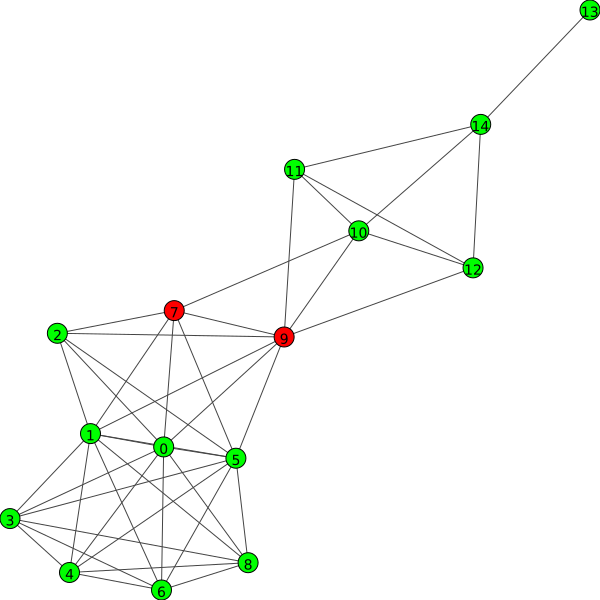

In [161]:
g = init_graph(15, 0.5)
get_knet(g, 3)
layout = g.layout("kk")
plot(g, layout=layout, margin=10)

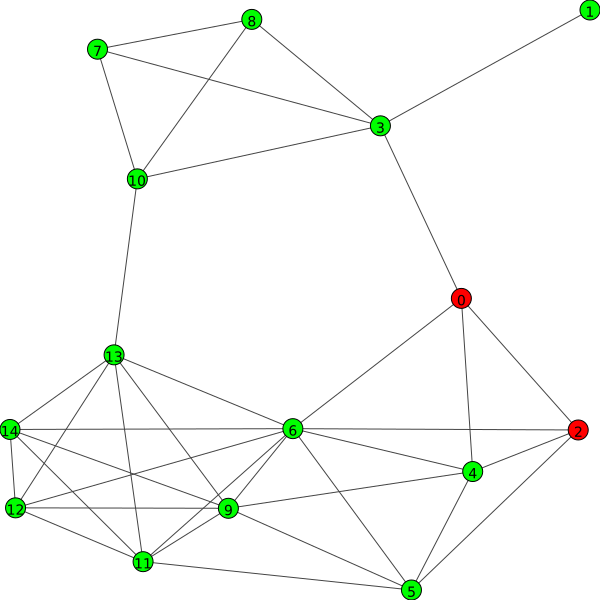

In [162]:
g = init_graph(15, 0.5)
get_knet(g, 3)
layout = g.layout("kk")
plot(g, layout=layout, margin=10)

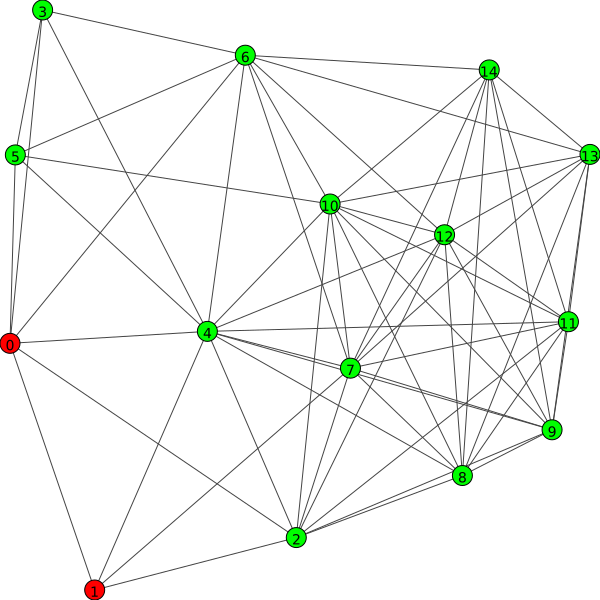

In [163]:
g = init_graph(15, 0.5)
get_knet(g, 3)
layout = g.layout("kk")
plot(g, layout=layout, margin=10)

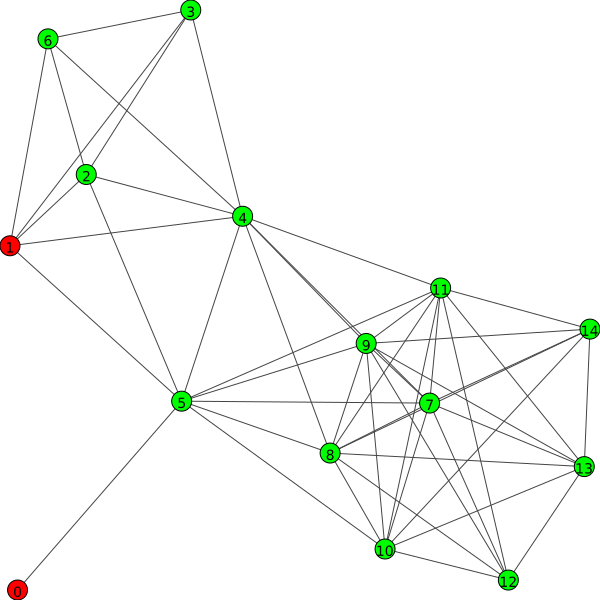

In [164]:
g = init_graph(15, 0.5)
get_knet(g, 3)
layout = g.layout("kk")
plot(g, layout=layout, margin=10)